Name: Pruthvi Shyam Billa

Course: BUDT704

Section: 501

Date: 10/07/22

# Bank Customer Analysis

The Terp Savings & Loan bank in College Park wishes to understand its customers. As a data analyst in the credit department, gaining insights from the data exported from TerpCRM will help business management to take necessary actions to develop customer relationships.

In [1]:
# Load the libraries required for the data analysis

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Credit Limit and Total Revolving Balance on the credit card

We will first load the entire dataset exported from TerpCRM:

In [2]:
# Load the dataset exported from TerpCRM

imported_dataset = np.loadtxt(r'HW3-credit-card-consumers.csv', skiprows=1, dtype=str, delimiter=',')
print(imported_dataset)

[['768805383' 'Existing Customer' '45' ... '42' '1.625' '0.061']
 ['818770008' 'Existing Customer' '49' ... '33' '3.714' '0.105']
 ['713982108' 'Existing Customer' '51' ... '20' '2.333' '0']
 ...
 ['716506083' 'Attrited Customer' '44' ... '60' '0.818' '0']
 ['717406983' 'Attrited Customer' '30' ... '62' '0.722' '0']
 ['714337233' 'Attrited Customer' '43' ... '61' '0.649' '0.189']]


Now let us load credit limit and total revolving balance variables of consumers and then perform some calculations:

In [3]:
# Load the variables

credit_limit = imported_dataset[:,13].astype(float)
total_revolving_bal = imported_dataset[:,14].astype(int)

# Print the first 5 values of each variable, display output

print(f'The first 5 values for credit limit variable in dollars: {credit_limit[0:5]}')
print(f'The first 5 values for total revolving balance variable in dollars: {total_revolving_bal[0:5]}')

The first 5 values for credit limit variable in dollars: [12691.  8256.  3418.  3313.  4716.]
The first 5 values for total revolving balance variable in dollars: [ 777  864    0 2517    0]


In [4]:
# Determine total number of customers in the bank

# Load variable having total count of client ID number column
total_customer_number = len(imported_dataset[:,1])

# Display output

print(f'Total number of customers in the bank: {total_customer_number}' )

Total number of customers in the bank: 10127


In [5]:
# Determine range of credit limits offered by the bank

minimum_credit_limit = credit_limit.min()
maximum_credit_limit = credit_limit.max()

# Display output

print(f'Range of credit limits offered by the bank is from ${minimum_credit_limit} to ${maximum_credit_limit}')

Range of credit limits offered by the bank is from $1438.3 to $34516.0


In [6]:
# Determine total credit available in the bank for all customers

total_credit_limit = credit_limit.sum()

# Display output

print(f'Total credit available for all customers in the bank: ${total_credit_limit}')

Total credit available for all customers in the bank: $87415795.1


In [7]:
# Determine percentage of customers having revolving balance less than average revolving balance


average_revolving_balance = total_revolving_bal.mean()
temp_array = total_revolving_bal[total_revolving_bal < average_revolving_balance]
rev_percentage_value = ( len(temp_array) / len(total_revolving_bal) ) * 100

# Display output

print(f'Percentage of customers having revolving balance less than average revolving balance is: {rev_percentage_value:0.2f}%')

Percentage of customers having revolving balance less than average revolving balance is: 44.65%


In [8]:
# Determine if credit card insurance is to be obtained by the bank

credit_insurance_array = credit_limit[credit_limit > 30000]
credit_percentage_value = ( len(credit_insurance_array) / len(credit_limit) ) * 100

# Display output

print(f'The bank need not worry about obtaining credit card insurance since only {credit_percentage_value:0.2f}% of customers \
have a credit limit above $30000')

The bank need not worry about obtaining credit card insurance since only 6.59% of customers have a credit limit above $30000


Since the pecentage of customers having credit limit above $30K is less than the threshold value of 10%, the bank need not worry.

### 2. Education Levels of the customers

Let's do data visualization using a bar chart to make inferences on different levels of education:

Frequency values for ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown'] education levels are [1013  451 3128 2013  516 1487 1519] respectively
Percentage values for ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown'] education levels are [10.00296238  4.4534413  30.88772588 19.87755505  5.09528982 14.6835193
 14.99950627] respectively
 The total percentage value: 100.0%


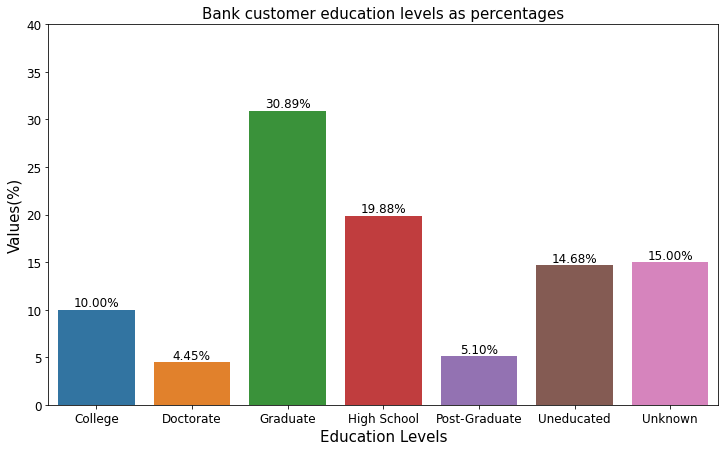

In [9]:
# Load the variable from the dataset

education_level = imported_dataset[:,5]

# Determine the frequency and percentage of all observations

education_lvl_unique, education_lvl_frequency = np.unique(education_level, return_counts=True)
education_percentage_value = ( education_lvl_frequency / np.sum(education_lvl_frequency) ) * 100

# Print the frequency and percentage of all observations, display output

print(f'Frequency values for {education_lvl_unique} education levels are {education_lvl_frequency} respectively')
print(f'Percentage values for {education_lvl_unique} education levels are {education_percentage_value} respectively')

# Verify total percentage values in the array are true
total_percentage_value = education_percentage_value.sum()
print(f' The total percentage value: {total_percentage_value}%')


# Bar chart  

plt.rcParams["figure.figsize"] = (12,7)
ax = sns.barplot(x=education_lvl_unique, y=education_percentage_value)


# Chart Title

plt.title('Bank customer education levels as percentages', fontsize=15)

# Horizontal axis attributes

plt.xlabel('Education Levels', fontsize=15)
plt.xticks(fontsize=12)

# Vertical axis attributes

plt.ylabel('Values(%)', fontsize=15)
plt.yticks(fontsize=12)
plt.ylim(0,40)

# Display percentage values in the bar chart for each level of education.

patches = ax.patches
for index in range(len(patches)):
    x = patches[index].get_x() + patches[index].get_width()/2
    y = patches[index].get_height()+.05
    ax.annotate('{:.2f}%'.format(education_percentage_value[index]), (x, y), ha='center', va="bottom", fontsize=12)


# Display the plot

plt.show()


#### Observation:
The above bar chart depicts the proportion of credit card consumers of different education levels in the College Park area.
Graduated customers are the highest number of credit card users accounting for 30.89%, while those with doctorate degrees have the least of 4.45%.

Moreover, the percentage of customers at the College level (10.00%) is approximately double that of Post-Graduates(5.10%). However, there is no significant difference between the education level percentages of Uneducated and Unknown.

#### Inference:
From the visualization, the credit card services provided by the bank are probably more inclined to graduate-level residents, followed by high school holders. Furthermore, customers having education degrees higher than graduate level have least preference comparatively to use credit cards offered by this bank.

### 3. Gender Inequities?
Bank's management believes there are gender inequities in the customer base. It is crucial to determine if their perception is correct. 
Reducing the gender gap would result in better stability in the banking system and also enhance economic growth.

Let us consider the case scenario- if the difference is higher than ten percentage points (10%) between the genders, then conclude management's perception is accurate:

The frequency values for ['F' 'M'] gender are [5358 4769]


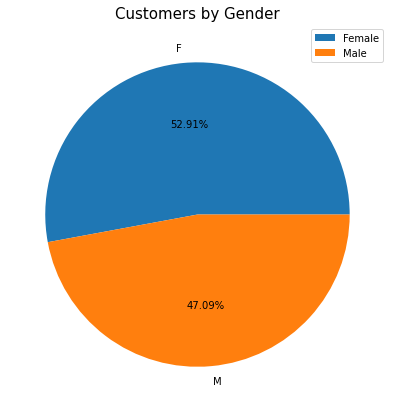

In [10]:
# Load the variable to determine total number of males and females from the dataset 

gender = imported_dataset[:,3]

# Determine the frequency for each gender type

gender_unique, gender_frequency = np.unique(gender, return_counts=True)

# Display output

print(f'The frequency values for {gender_unique} gender are {gender_frequency}')

# Pie Chart and attributes

plt.pie(gender_frequency, labels = gender_unique, autopct='%.2f%%')
plt.rcParams["figure.figsize"] = (12,7)
plt.title('Customers by Gender', fontsize=15)
plt.legend(['Female','Male'], loc="best")

# Display the plot

plt.show()


The above pie chart illustrates the total number of male and female clients for the bank in percentages. Overall, it is evident that the difference in the percentage values of both genders is minimal, much less than 10% (52.91-47.09 = 5.82)%, implying we can assume there is gender equality.

In conclusion, the data does not support that there is a significant difference in the number of male and female customers for the bank.

### 4. Risk Analysis


Now, let us figure out and analyze if there is a risk to the bank's operations using the customer's average utilization ratio.
We can decide based on the following condition- average utilization ratio less than 20% or greater than 80% poses a risk to the bank's operations:

In [11]:
# Load the variable

avg_utilization_ratio = imported_dataset[:,19].astype(float)

# Determine risk percentage value

risk_percentage_value = (np.count_nonzero( (avg_utilization_ratio < 1/5) | 
                                           (avg_utilization_ratio > 4/5) ) ) / len(avg_utilization_ratio) * 100

# Display output

print(f"Percentage of customers posing a risk to the bank's operations: {risk_percentage_value:0.2f}%")

Percentage of customers posing a risk to the bank's operations: 57.28%


In conclusion, the risk percentage value of the customers is significantly high, at 57.28%. Seeing these results, the bank may feel there is a risk posed to the bank's operations.

#### Inference

We can infer that more than half of the customers satisfy the condition to pose a risk to the operations of Terp Savings & Loan Bank. The bank should identify the reasons for over or under-utilization of the credit limit. Data needs to be collected for the underlying factors and then perform necessary steps to address them.

In [12]:
# On average credit utilization less than 20%, frequency and percentage

avg_utilization_ratio1 = np.count_nonzero(avg_utilization_ratio < 1/5)
risk_percentage_value1 = avg_utilization_ratio1 / len(avg_utilization_ratio) * 100

# On average credit utilization greater than 80%, frequency and percentage

avg_utilization_ratio2 = np.count_nonzero(avg_utilization_ratio > 4/5)
risk_percentage_value2 = avg_utilization_ratio2 / len(avg_utilization_ratio) * 100

# Display output

print(f'Percentage of customers having less than 20% average utilization of credit limit: {risk_percentage_value1:.2f}%')
print(f'Percentage of customers having greater than 80% average utilization of credit limit: {risk_percentage_value2:.2f}%')

Percentage of customers having less than 20% average utilization of credit limit: 52.67%
Percentage of customers having greater than 80% average utilization of credit limit: 4.61%


The bank should prioritize marketing and advertisements, especially for customers with average utilization of credit limit of less than 20%, to increase their credit usage by providing special rewards/incentives. Converting this category of customers into non-risk would drastically decrease the risk percentage value.

### 4. Income Range

Bank's management has approved a new proposal to create a new ad campaign. Let us determine which income range the bank should target to attract new customers:

In [13]:
# Load the variable

income_category = imported_dataset[:,7]

# Determine the frequency for each income range

income_category_unique, income_category_frequency = np.unique(income_category, return_counts=True)

# Display output

print(f'Frequency values for each income range {income_category_unique} are {income_category_frequency} respectively')


Frequency values for each income range ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown'] are [ 727 1790 1402 1535 3561 1112] respectively


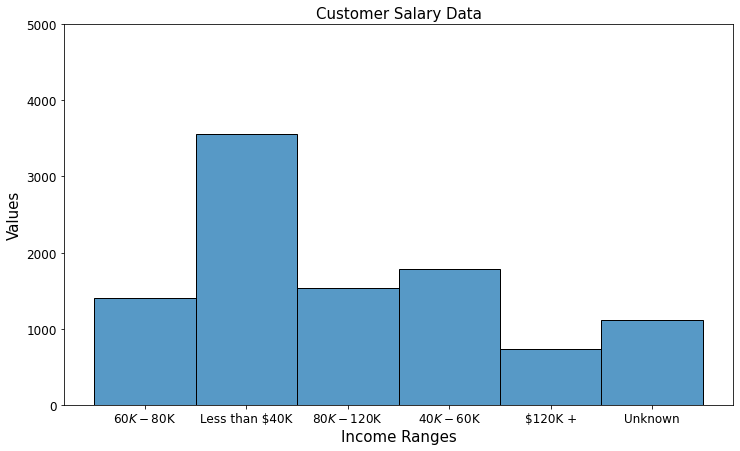

In [14]:
# Histogram Plot

sns.histplot(x=income_category)

# Chart Title

plt.title('Customer Salary Data', fontsize=15)

# Horizontal axis attributes

plt.xlabel('Income Ranges', fontsize=15)
plt.xticks(fontsize=12)

# Horizontal axis attributes

plt.ylabel('Values', fontsize=15)
plt.yticks(fontsize=12)
plt.ylim(0,5000)

# Display the plot

plt.show()


The above histogram shows the customer income data for the bank. We have different income ranges along the horizantal axis and corresponding frequency values on the vertical axis. 
Overall, the income range with the highest number of customers is 'Less than $40k' category.

In [15]:
print(f"Number of customers in 'Less than $40k' income range: {np.max(income_category_frequency)}")

Number of customers in 'Less than $40k' income range: 3561


In conclusion, the management should target the 'Less than $40k' income range for the following reasons:
1. Campaign Impact- An advertisement needs to get noticed. More customers in a particular income range will create a positive network effect. 
2. Referral- Give existing customers in this range reward/loyalty points if they bring in a new customer to the bank.



### 4. Bundling

It is interesting to analyze how many products are used by each bank customer. In business terms, it is defined as the total relationship count between the bank and a client. 
If the bank wishes to increase the product usage, bundling is a perfect strategy:

There are [ 910 1243 2305 1912 1891 1866] customers using [1 2 3 4 5 6] bank products respectively


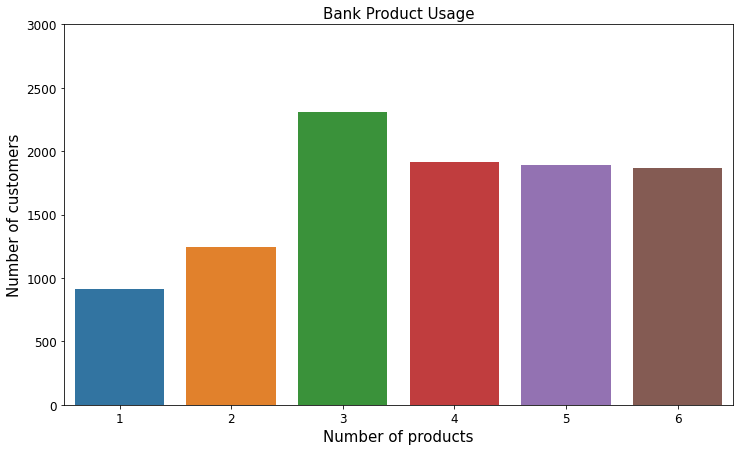

In [16]:
# Load the variable

total_relationship_count = imported_dataset[:,10].astype(int)

total_relationship_unique, total_relationship_frequency = np.unique(total_relationship_count, return_counts=True)
print(f'There are {total_relationship_frequency} customers using {total_relationship_unique} bank products respectively')


# Bar chart 

plt.rcParams["figure.figsize"] = (12,7)
sns.barplot(x=total_relationship_unique, y=total_relationship_frequency)


# Chart Title

plt.title('Bank Product Usage', fontsize=15)

# Horizontal axis attributes

plt.xlabel('Number of products', fontsize=15)
plt.xticks(fontsize=12)

# Vertical axis attributes

plt.yticks(fontsize=12)
plt.ylabel('Number of customers', fontsize=15)
plt.ylim(0,3000)

# Display plot

plt.show()


#### Observation:
The above barplot illustrates the number of products used by the bank's clientele in the range of one to six. 
To begin with, customers using more than three products offered by the bank follow a similar trend, having approximately equal values.
Moreover, there are 2305 customers with a total relationship count of three (utilizing three products), the largest compared to all others. In contrast, only 910 customers use one bank product.

#### Inference:
Let us figure out if bundling the products has any advantages with the help of the given dataset.
Bundling is the practice of selling two or more products together. All the existing customers using only one product should choose at least one additional product. In return, the bank can offer some incentives to these customers. It will eventually increase the bank's profit.


"I pledge on my honor that I have not given nor received any unauthorized
     assistance on this assignment."

--Pruthvi Shyam Billa